In [8]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt


from aenum import MultiValueEnum
from matplotlib.colors import ListedColormap, BoundaryNorm


In [3]:
ds_rio = xr.open_dataset('/home/ck/DIR/cornkle/data/HUARAZ/Lorenz_NDVI/300m_LC_RioSanta.nc')

In [4]:
ds_rio

<xarray.Dataset>
Dimensions:              (bounds: 2, lat: 577, lon: 352, time: 1)
Coordinates:
  * lat                  (lat) float64 -8.635 -8.638 -8.64 ... -10.23 -10.23
  * lon                  (lon) float64 -78.0 -77.99 -77.99 ... -77.02 -77.02
  * time                 (time) datetime64[ns] 2018-01-01
Dimensions without coordinates: bounds
Data variables:
    lccs_class           (time, lat, lon) uint8 ...
    processed_flag       (time, lat, lon) float32 ...
    current_pixel_state  (time, lat, lon) float32 ...
    observation_count    (time, lat, lon) uint16 ...
    change_count         (time, lat, lon) uint8 ...
    crs                  int32 ...
    lat_bounds           (lat, bounds) float64 ...
    lon_bounds           (lon, bounds) float64 ...
    time_bounds          (time, bounds) datetime64[ns] ...
Attributes:
    id:                         C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1
    title:                      Land Cover Map of 2018
    summary:                    This dataset characterizes the land cover of ...
    type:                       C3S-LC-L4-LCCS-Map-300m-P1Y
    project:                    EC C3S Land cover
    references:                 https://cds.climate.copernicus.eu/
    institution:                UCLouvain
    contact:                    copernicus-support@ecmwf.int
    comment:                    
    Conventions:                CF-1.6
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Standard Nam...
    keywords:                   land cover classification,satellite,observation
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    license:                    EC C3S Land cover Data Policy
    naming_authority:           
    cdm_data_type:              grid
    TileSize:                   2025:2025
    tracking_id:                b0ea3056-933e-408a-9f58-99c2072c3cb2
    product_version:            2.1.1
    creation_date:              20190819T082510Z
    creator_name:               UCLouvain
    creator_url:                http://www.uclouvain.be/
    creator_email:              landcover-cci@uclouvain.be
    source:                     PROBA-V
    history:                    lc-sr-1.0, lc-classification-1.0,lc-user-tool...
    time_coverage_start:        20180101
    time_coverage_end:          20181231
    time_coverage_duration:     P1Y
    time_coverage_resolution:   P1Y
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         null
    geospatial_lon_max:         null
    spatial_resolution:         300m
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.002778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778

In [5]:
#get values
vals = ds_rio['lccs_class'].flag_values
names = ds_rio['lccs_class'].flag_meanings.rsplit(' ',40)
cols = ds_rio['lccs_class'].flag_colors.rsplit(' ', 40)
#insert no data color
cols.insert(0, '#000000')

In [9]:
#most pythonic string formatting ever... next time strg+c,strg+v :D
for i in range(len(vals)):
    n = ''.join([' ' for s in range(42 - len(names[i]))])
    v = ''.join([' ' for s in range(3 - len(str(vals[i])))])
    print(names[i], n, '=', "'",(names[i]),"'",',', n, vals[i],',',v, "'",cols[i],"'")

no_data                                     = ' no_data ' ,                                     0 ,    ' #000000 '
cropland_rainfed                            = ' cropland_rainfed ' ,                            10 ,   ' #ffff64 '
cropland_rainfed_herbaceous_cover           = ' cropland_rainfed_herbaceous_cover ' ,           11 ,   ' #ffff64 '
cropland_rainfed_tree_or_shrub_cover        = ' cropland_rainfed_tree_or_shrub_cover ' ,        12 ,   ' #ffff00 '
cropland_irrigated                          = ' cropland_irrigated ' ,                          20 ,   ' #aaf0f0 '
mosaic_cropland                             = ' mosaic_cropland ' ,                             30 ,   ' #dcf064 '
mosaic_natural_vegetation                   = ' mosaic_natural_vegetation ' ,                   40 ,   ' #c8c864 '
tree_broadleaved_evergreen_closed_to_open   = ' tree_broadleaved_evergreen_closed_to_open ' ,   50 ,   ' #006400 '
tree_broadleaved_deciduous_closed_to_open   = ' tree_broadleaved_deciduous_close

In [58]:
class LC(MultiValueEnum):
    """ Enum class containing basic LULC types
    """
    no_data                                     = 'no_data' ,                                     0 ,    '#000000'
    cropland_rainfed                            = 'cropland_rainfed' ,                            10 ,   '#ffff64'
    cropland_rainfed_herbaceous_cover           = 'cropland_rainfed_herbaceous_cover' ,           11 ,   '#ffff63'
    cropland_rainfed_tree_or_shrub_cover        = 'cropland_rainfed_tree_or_shrub_cover' ,        12 ,   '#ffff00'
    cropland_irrigated                          = 'cropland_irrigated' ,                          20 ,   '#aaf0f0'
    mosaic_cropland                             = 'mosaic_cropland' ,                             30 ,   '#dcf064'
    mosaic_natural_vegetation                   = 'mosaic_natural_vegetation' ,                   40 ,   '#c8c864'
    tree_broadleaved_evergreen_closed_to_open   = 'tree_broadleaved_evergreen_closed_to_open' ,   50 ,   '#006400'
    tree_broadleaved_deciduous_closed_to_open   = 'tree_broadleaved_deciduous_closed_to_open' ,   60 ,   '#00a000'
    tree_broadleaved_deciduous_closed           = 'tree_broadleaved_deciduous_closed' ,           61 ,   '#00a001'
    tree_broadleaved_deciduous_open             = 'tree_broadleaved_deciduous_open' ,             62 ,   '#aac800'
    tree_needleleaved_evergreen_closed_to_open  = 'tree_needleleaved_evergreen_closed_to_open' ,  70 ,   '#003c00'
    tree_needleleaved_evergreen_closed          = 'tree_needleleaved_evergreen_closed' ,          71 ,   '#003c01'
    tree_needleleaved_evergreen_open            = 'tree_needleleaved_evergreen_open' ,            72 ,   '#005000'
    tree_needleleaved_deciduous_closed_to_open  = 'tree_needleleaved_deciduous_closed_to_open' ,  80 ,   '#285000'
    tree_needleleaved_deciduous_closed          = 'tree_needleleaved_deciduous_closed' ,          81 ,   '#285001'
    tree_needleleaved_deciduous_open            = 'tree_needleleaved_deciduous_open' ,            82 ,   '#286400'
    tree_mixed                                  = 'tree_mixed' ,                                  90 ,   '#788200'
    mosaic_tree_and_shrub                       = 'mosaic_tree_and_shrub' ,                       100 ,  '#8ca000'
    mosaic_herbaceous                           = 'mosaic_herbaceous' ,                           110 ,  '#be9600'
    shrubland                                   = 'shrubland' ,                                   120 ,  '#966400'
    shrubland_evergreen                         = 'shrubland_evergreen' ,                         121 ,  '#966401'
    shrubland_deciduous                         = 'shrubland_deciduous' ,                         122 ,  '#966402'
    grassland                                   = 'grassland' ,                                   130 ,  '#ffb432'
    lichens_and_mosses                          = 'lichens_and_mosses' ,                          140 ,  '#ffdcd2'
    sparse_vegetation                           = 'sparse_vegetation' ,                           150 ,  '#ffebaf'
    sparse_tree                                 = 'sparse_tree' ,                                 151 ,  '#ffc864'
    sparse_shrub                                = 'sparse_shrub' ,                                152 ,  '#ffd278'
    sparse_herbaceous                           = 'sparse_herbaceous' ,                           153 ,  '#ffeba1'
    tree_cover_flooded_fresh_or_brakish_water   = 'tree_cover_flooded_fresh_or_brakish_water' ,   160 ,  '#00785a'
    tree_cover_flooded_saline_water             = 'tree_cover_flooded_saline_water' ,             170 ,  '#009678'
    shrub_or_herbaceous_cover_flooded           = 'shrub_or_herbaceous_cover_flooded' ,           180 ,  '#00dc82'
    urban                                       = 'urban' ,                                       190 ,  '#c31400'
    bare_areas                                  = 'bare_areas' ,                                  200 ,  '#fff5d8'
    bare_areas_consolidated                     = 'bare_areas_consolidated' ,                     201 ,  '#dcdcdc'
    bare_areas_unconsolidated                   = 'bare_areas_unconsolidated' ,                   202 ,  '#fff5d7'
    water                                       = 'water' ,                                       210 ,  '#0046c8'
    snow_and_ice                                = 'snow_and_ice' ,                                220 ,  '#ffffff'

    @property
    def id(self):
        """ Returns an ID of an enum type

        :return: An ID
        :rtype: int
        """
        return self.values[1]
    @property
    def color(self):
        """ Returns class color

        :return: A color in hexadecimal representation
        :rtype: str
        """
        return self.values[2]

    
def get_bounds_from_ids(ids):
    bounds = []
    for i in range(len(ids)):
        if i < len(ids) - 1:
            if i == 0:
                diff = (ids[i + 1] - ids[i]) / 2
                bounds.append(ids[i] - diff)
            diff = (ids[i + 1] - ids[i]) / 2
            bounds.append(ids[i] + diff)
        else:
            diff = (ids[i] - ids[i - 1]) / 2
            bounds.append(ids[i] + diff)
    return bounds


# Reference colormap things
bounds = get_bounds_from_ids([x.id for x in LC])
ccmap = ListedColormap([x.color for x in LC], name="lc_cmap")
norm = BoundaryNorm(bounds, cmap.N)
    


In [59]:
def discrete_cmap(N, base_cmap='None'):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)

    #return base.from_list(cmap_name, color_list, N)
    return plt.cm.get_cmap(base_cmap, N)

def discrete_cmap_norm(levels, cmap):

    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap(cmap)
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    return norm

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.


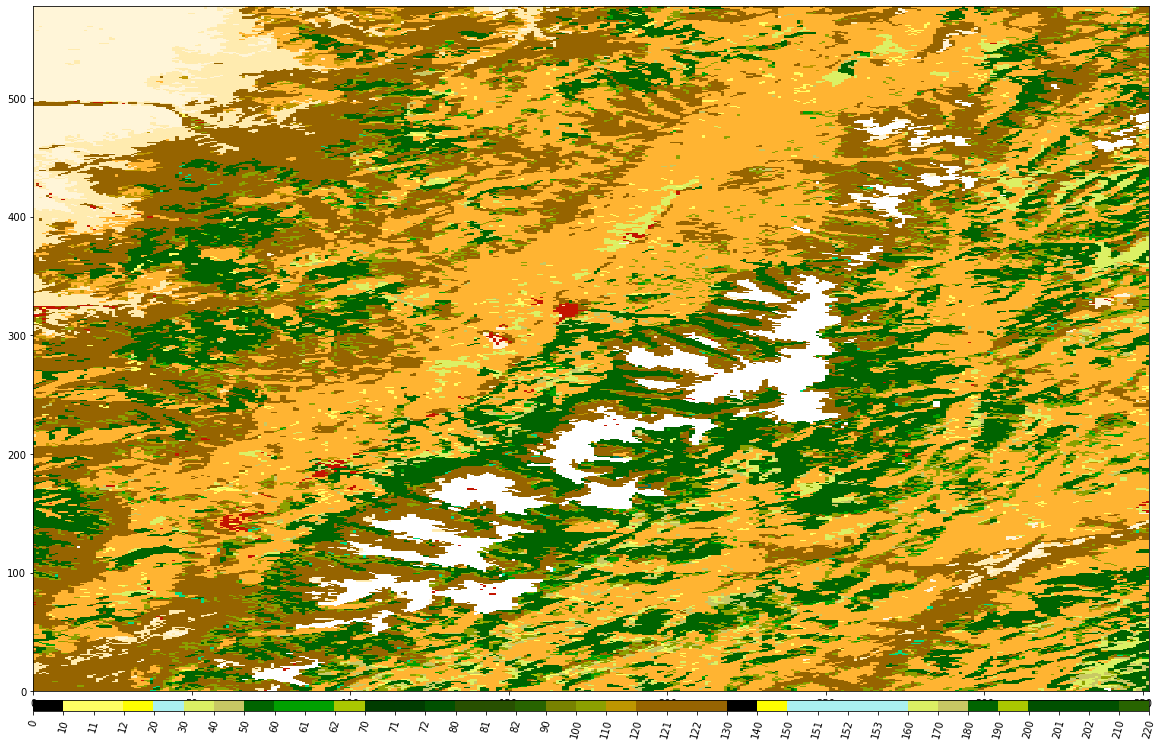

In [61]:
fig, ax = plt.subplots(figsize=(20,15))
#cmap = discrete_cmap(len(names), base_cmap='jet')
norm = discrete_cmap_norm(vals,ccmap)
im = ax.pcolormesh(ds_rio['lccs_class'].isel(time=0),cmap=ccmap, norm=norm, vmin=np.min(vals), vmax=np.max(vals)) #, norm=norm  vmin=0, vmax=np.max(ds_rio['lccs_class'].isel(time=0))
#ax.set_xticks([])
#ax.set_yticks([])
ax.set_aspect('auto')
#plt.xticks(np.arange(len(names)))
cb = fig.colorbar(im, orientation='horizontal', pad=0.01, aspect=100, ticks=vals )
#cbar = f.colorbar(mappable, ticks=np.linspace(dat['vmin'],dat['vmax'],13))
#cb.ax.tick_params(labelsize=9)
#cb.set_ticks([entry.id for entry in LC])
cb.ax.set_xticklabels(vals, rotation=75, fontsize=10);
